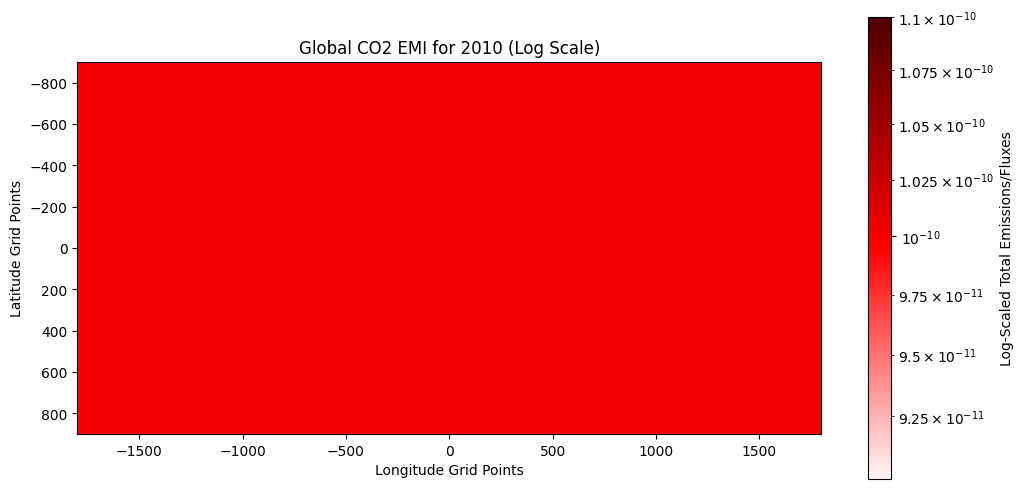

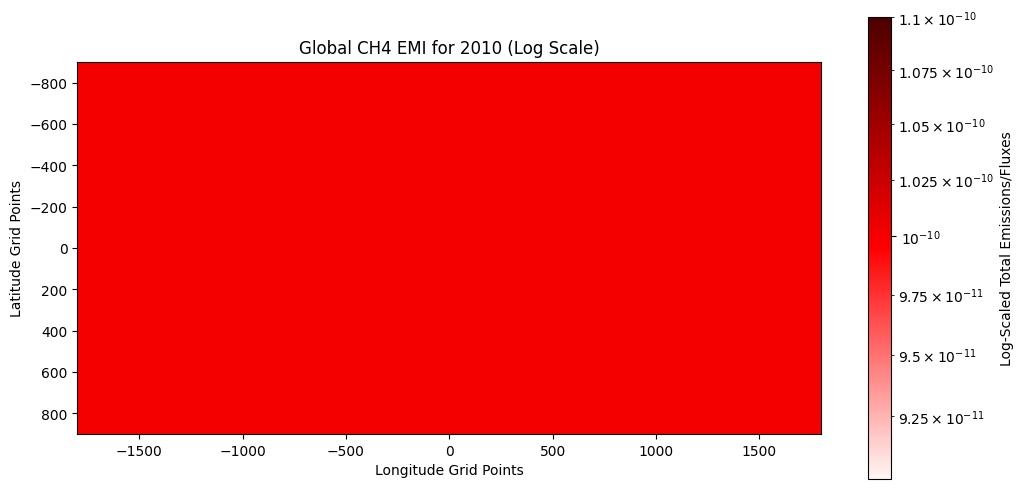

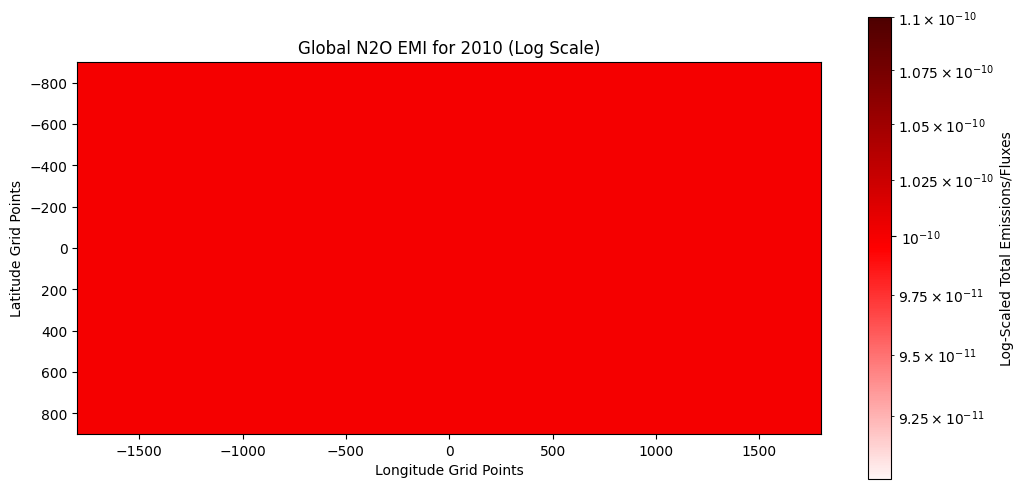

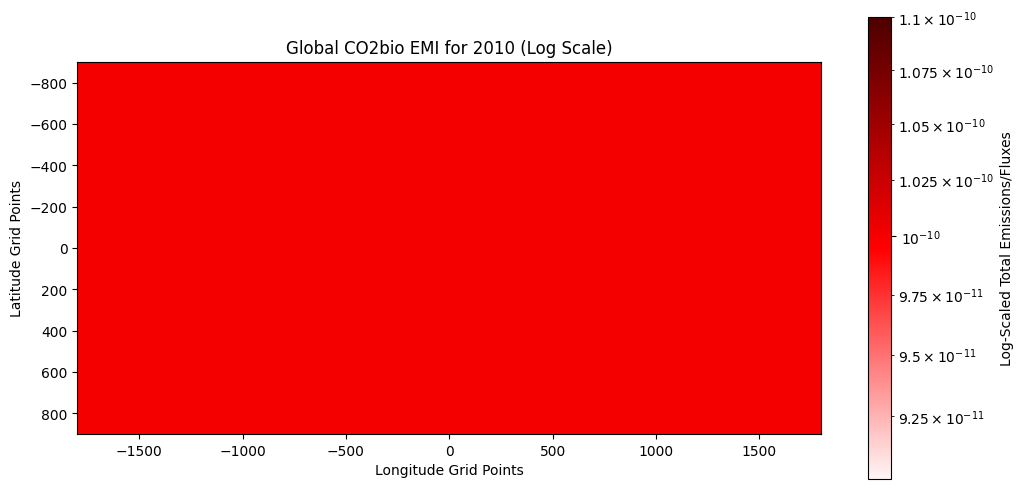

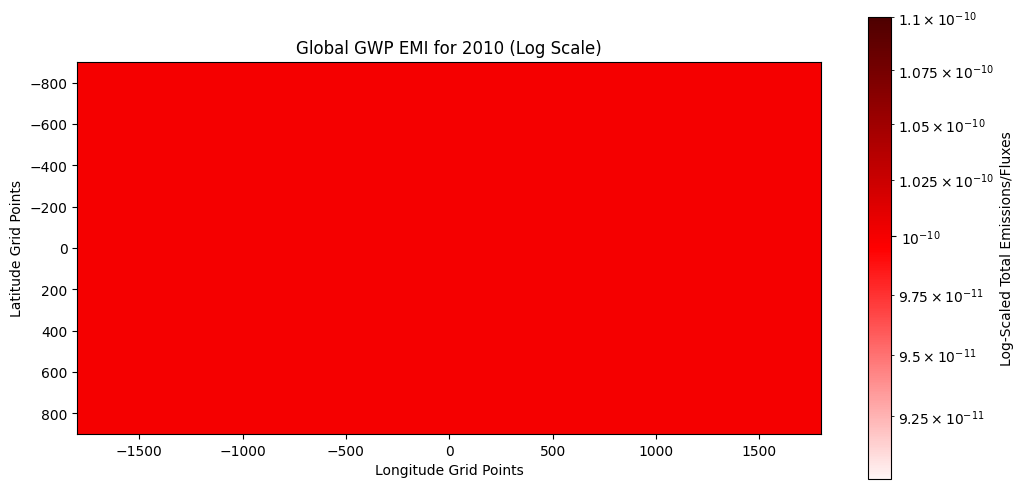

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, LinearSegmentedColormap

# 1. Identify the current working directory
current_dir = os.getcwd()

# 2. Build the path to the .npy file in this directory
super_tensor_file = os.path.join(current_dir, "../super_emissions_tensor_part0.npy")

# 3. Load the .npy file (can memory-map if desired)
#    If the file is large, mmap_mode='r' can help avoid loading it entirely into RAM
super_tensor = np.load(super_tensor_file, mmap_mode='r')

# (Optional) If you want to confirm shape:
# expected_shape = (5, 2, 288, 1800, 3600)
# if super_tensor.shape != expected_shape:
#     raise ValueError(f"Loaded tensor shape {super_tensor.shape} != expected {expected_shape}")

# 4. Define mappings
molecule_types = ["CH4", "CO2", "CO2bio", "GWP", "N2O"]
data_types = ["emi", "flx"]
years = list(range(2000, 2003))

# 5. Define a custom red-based colormap
red_gradient = LinearSegmentedColormap.from_list("red_gradient", ["#fff5f5", "#ff0000", "#4d0000"])

# 6. Helper function to get yearly data
def get_yearly_data(tensor, molecule, data_type, year):
    """Extract yearly emissions/flux data for a given molecule, data type, and year."""
    molecule_idx = molecule_types.index(molecule)
    data_type_idx = data_types.index(data_type)

    # Convert year to tensor indices
    year_index = (year - 2000) * 12  # 12 months per year
    year_slice = slice(year_index, year_index + 12)

    # Sum across months to get yearly totals
    yearly_data = np.sum(tensor[molecule_idx, data_type_idx, year_slice, :, :], axis=0)
    yearly_data = np.where(yearly_data == 0, 1e-10, yearly_data)  # Replace zeros for log scale
    return yearly_data

# 7. Function to plot the data
def plot_emission_data(data, title, extent, cmap=red_gradient):
    """Plot the emissions/flux data with proper scaling and formatting."""
    norm = LogNorm(vmin=data.min(), vmax=data.max())

    plt.figure(figsize=(12, 6))
    plt.imshow(data, cmap=cmap, interpolation='nearest', extent=extent, norm=norm)
    plt.colorbar(label="Log-Scaled Total Emissions/Fluxes")
    plt.title(title)
    plt.xlabel("Longitude Grid Points")
    plt.ylabel("Latitude Grid Points")
    plt.gca().invert_yaxis()  # Correct orientation
    plt.show()

# 8. High-level function for a single year & molecule
def plot_specific_emission(tensor, molecule, data_type, year, extent):
    """Plot specific molecule, data type, and year from the tensor."""
    yearly_data = get_yearly_data(tensor, molecule, data_type, year)
    plot_title = f"Global {molecule} {data_type.upper()} for {year} (Log Scale)"
    plot_emission_data(yearly_data, plot_title, extent)

# 9. Example usage with CO2, CH4, N2O, CO2bio, and GWP for 2010
example_extent = [-1800, 1800, -900, 900]

plot_specific_emission(super_tensor, "CO2",    "emi", 2010, extent=example_extent)
plot_specific_emission(super_tensor, "CH4",    "emi", 2010, extent=example_extent)
plot_specific_emission(super_tensor, "N2O",    "emi", 2010, extent=example_extent)
plot_specific_emission(super_tensor, "CO2bio", "emi", 2010, extent=example_extent)
plot_specific_emission(super_tensor, "GWP",    "emi", 2010, extent=example_extent)
